In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

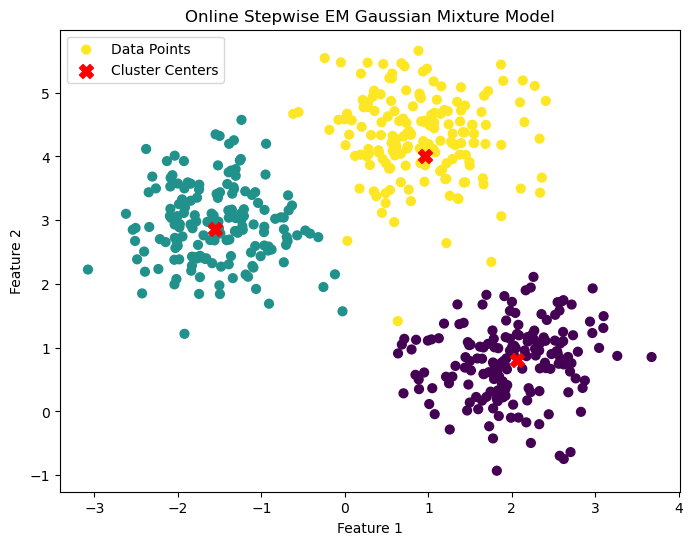

In [ ]:
# def initialize_s_i(n_components, n_features, random_state=None):
#     # Random initialization without seeing the entire dataset
#     if random_state is not None:
#         np.random.seed(random_state)
    
#     # Initialize gamma, gamma_x, gamma_xx randomly
#     gamma = np.random.rand(n_components)
#     gamma /= gamma.sum()  # Normalize to sum to 1
#     gamma_x = np.random.rand(n_components, n_features)
#     gamma_xx = np.array([np.eye(n_features) for _ in range(n_components)])  # Initialize as identity matrices to ensure positive semidefiniteness
    
#     return gamma, gamma_x, gamma_xx

# def compute_responsibilities(x_i, pi, mu_k, sigma_k):
#     n_components = len(pi)
#     probs = np.zeros(n_components)
#     for k in range(n_components):
#         probs[k] = pi[k] * multivariate_normal.pdf(x_i, mean=mu_k[k], cov=sigma_k[k])
#     return probs

# def compute_parameters(mu, n_samples):
#     pi = mu['N'] / n_samples
#     mu_k = mu['sum_x'] / mu['N'][:, np.newaxis]
#     n_components, n_features = mu_k.shape
#     sigma_k = np.empty((n_components, n_features, n_features))
#     for k in range(n_components):
#         sigma_k[k] = mu['sum_xx'][k] / mu['N'][k] - np.outer(mu_k[k], mu_k[k])
#         # Ensure sigma_k is positive semidefinite
#         sigma_k[k] = (sigma_k[k] + sigma_k[k].T) / 2  # Symmetrize
#         eigvals, eigvecs = np.linalg.eigh(sigma_k[k])
#         eigvals[eigvals < 1e-6] = 1e-6  # Clip eigenvalues to ensure positive semidefiniteness
#         sigma_k[k] = eigvecs @ np.diag(eigvals) @ eigvecs.T
#     return pi, mu_k, sigma_k

# def online_stepwise_em_gmm(X, n_components, T, alpha=0.6, random_state=None):
#     n_samples, n_features = X.shape
#     if random_state is not None:
#         np.random.seed(random_state)
    
#     # Initialize parameters
#     gamma, gamma_x, gamma_xx = initialize_s_i(n_components, n_features, random_state)
#     mu = {
#         'N': gamma,
#         'sum_x': gamma_x,
#         'sum_xx': gamma_xx
#     }
    
#     k = 0  # Step counter
    
#     # EM iterations
#     for t in range(T):
#         X, indices = shuffle(X, np.arange(n_samples), random_state=random_state)
#         for i in indices:
#             x_i = X[i]
            
#             # Compute responsibilities for data point x_i
#             probs = compute_responsibilities(x_i, mu['N'] / n_samples, mu['sum_x'] / mu['N'][:, np.newaxis], mu['sum_xx'] / mu['N'][:, np.newaxis, np.newaxis])
#             gamma_prime = probs / probs.sum()
            
#             # Compute new sufficient statistics s'_i
#             s_prime_i_gamma = gamma_prime
#             s_prime_i_gamma_x = gamma_prime[:, np.newaxis] * x_i
#             s_prime_i_gamma_xx = np.array([gamma_prime[k] * np.outer(x_i, x_i) for k in range(n_components)])
            
#             # Update stepsize
#             eta_k = (k + 2) ** -alpha
            
#             # Update global sufficient statistics μ
#             mu['N'] = (1 - eta_k) * mu['N'] + eta_k * s_prime_i_gamma
#             mu['sum_x'] = (1 - eta_k) * mu['sum_x'] + eta_k * s_prime_i_gamma_x
#             mu['sum_xx'] = (1 - eta_k) * mu['sum_xx'] + eta_k * s_prime_i_gamma_xx
            
#             k += 1
    
#     # Compute final parameters
#     pi, mu_k, sigma_k = compute_parameters(mu, n_samples)
#     return pi, mu_k, sigma_k

# # Example usage
# if __name__ == "__main__":
#     X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=0)
#     n_components = 3
#     T = 2  # Number of iterations
#     alpha = 0.7  # Stepwise parameter
#     random_state = 42
    
#     pi, mu_k, sigma_k = online_stepwise_em_gmm(X, n_components=n_components, T=T, alpha=alpha, random_state=random_state)
    
#     # Assign clusters and plot results
#     labels = np.zeros(X.shape[0], dtype=int)
#     for i in range(X.shape[0]):
#         x_i = X[i]
#         probs = compute_responsibilities(x_i, pi, mu_k, sigma_k)
#         labels[i] = np.argmax(probs)
    
#     plt.figure(figsize=(8, 6))
#     plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', label='Data Points')
#     plt.scatter(mu_k[:, 0], mu_k[:, 1], c='red', s=100, marker='X', label='Cluster Centers')
#     plt.title('Online Stepwise EM Gaussian Mixture Model')
#     plt.xlabel('Feature 1')
#     plt.ylabel('Feature 2')
#     plt.legend()
#     plt.show()


In [ ]:
# def initialize_s_i(X, n_components, random_state=None):
#     # Initialization code remains unchanged.
#     n_samples, n_features = X.shape
#     if random_state is not None:
#         np.random.seed(random_state)
#     gamma = np.random.rand(n_samples, n_components)
#     gamma /= gamma.sum(axis=1, keepdims=True)
#     gamma_x = gamma[:, :, np.newaxis] * X[:, np.newaxis, :]
#     gamma_xx = np.empty((n_samples, n_components, n_features, n_features))
#     for i in range(n_samples):
#         for k in range(n_components):
#             x = X[i]
#             gamma_xx[i, k] = gamma[i, k] * np.outer(x, x)
#     return gamma, gamma_x, gamma_xx

# def compute_responsibilities(x_i, pi, mu_k, sigma_k):
#     n_components = len(pi)
#     probs = np.zeros(n_components)
#     for k in range(n_components):
#         probs[k] = pi[k] * multivariate_normal.pdf(x_i, mean=mu_k[k], cov=sigma_k[k])
#     return probs

# def compute_parameters(mu, n_samples):
#     pi = mu['N'] / n_samples
#     mu_k = mu['sum_x'] / mu['N'][:, np.newaxis]
#     n_components, n_features = mu_k.shape
#     sigma_k = np.empty((n_components, n_features, n_features))
#     for k in range(n_components):
#         sigma_k[k] = mu['sum_xx'][k] / mu['N'][k] - np.outer(mu_k[k], mu_k[k])
#     return pi, mu_k, sigma_k

# def online_stepwise_em_gmm(X, n_components, T, alpha=0.6, random_state=None):
#     n_samples, n_features = X.shape
#     if random_state is not None:
#         np.random.seed(random_state)
    
#     # Initialize parameters
#     gamma, gamma_x, gamma_xx = initialize_s_i(X, n_components, random_state)
#     mu = {
#         'N': gamma.sum(axis=0),
#         'sum_x': gamma_x.sum(axis=0),
#         'sum_xx': gamma_xx.sum(axis=0)
#     }
    
#     k = 0  # Step counter
    
#     # EM iterations
#     for t in range(T):
#         X, indices = shuffle(X, np.arange(n_samples), random_state=random_state)
#         for i in indices:
#             x_i = X[i]

#             pi, mu_k, sigma_k = compute_parameters(mu, n_samples)
            
#             # Compute responsibilities for data point x_i
#             probs = compute_responsibilities(x_i, pi, mu_k, sigma_k)
#             gamma_prime = probs / probs.sum()
            
#             # Compute new sufficient statistics s'_i
#             s_prime_i_gamma = gamma_prime
#             s_prime_i_gamma_x = gamma_prime[:, np.newaxis] * x_i
#             s_prime_i_gamma_xx = np.array([gamma_prime[k] * np.outer(x_i, x_i) for k in range(n_components)])
            
#             # Update stepsize
#             eta_k = (k + 2) ** -alpha
            
#             # Update global sufficient statistics μ
#             mu['N'] = (1 - eta_k) * mu['N'] + eta_k * s_prime_i_gamma
#             mu['sum_x'] = (1 - eta_k) * mu['sum_x'] + eta_k * s_prime_i_gamma_x
#             mu['sum_xx'] = (1 - eta_k) * mu['sum_xx'] + eta_k * s_prime_i_gamma_xx
            
#             k += 1
    
#     # Compute final parameters
#     pi, mu_k, sigma_k = compute_parameters(mu, n_samples)
#     return pi, mu_k, sigma_k



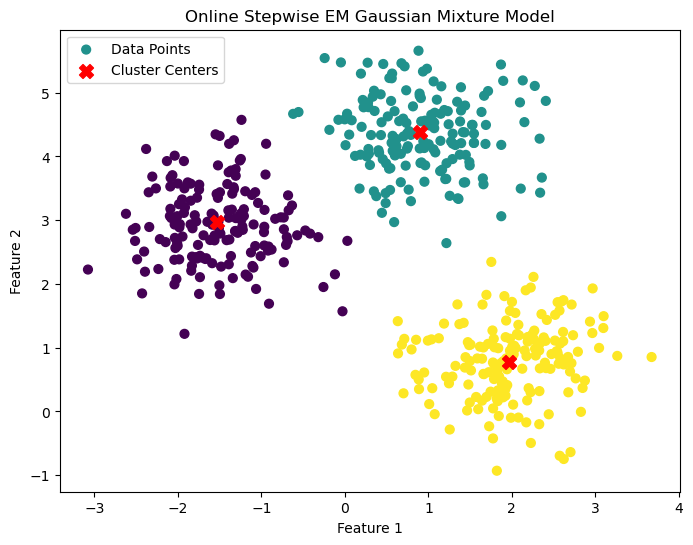

In [ ]:

# # Example usage
# if __name__ == "__main__":
#     X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=0)
#     n_components = 3
#     T = 10  # Number of iterations
#     alpha = 0.6  # Stepwise parameter
#     random_state = 42
    
#     pi, mu_k, sigma_k = online_stepwise_em_gmm(X, n_components=n_components, T=T, alpha=alpha, random_state=random_state)
    
#     # Assign clusters and plot results
#     labels = np.zeros(X.shape[0], dtype=int)
#     for i in range(X.shape[0]):
#         x_i = X[i]
#         probs = compute_responsibilities(x_i, pi, mu_k, sigma_k)
#         labels[i] = np.argmax(probs)
    
#     plt.figure(figsize=(8, 6))
#     plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', label='Data Points')
#     plt.scatter(mu_k[:, 0], mu_k[:, 1], c='red', s=100, marker='X', label='Cluster Centers')
#     plt.title('Online Stepwise EM Gaussian Mixture Model')
#     plt.xlabel('Feature 1')
#     plt.ylabel('Feature 2')
#     plt.legend()
#     plt.show()

In [ ]:
# Aggressive update

# def compute_responsibility(x_i, pi, mu_k, sigma_k):
#     n_components = len(pi)
#     probs = np.zeros(n_components)
    
#     # Calculate distances to each center
#     distances = np.array([np.sum((x_i - mu_k[k])**2) for k in range(n_components)])
    
#     for k in range(n_components):
#         try:
#             probs[k] = pi[k] * multivariate_normal.pdf(x_i, mean=mu_k[k], cov=sigma_k[k])
#         except np.linalg.LinAlgError:
#             sigma_k[k] = np.eye(len(x_i)) * np.trace(sigma_k[k]) / len(x_i)
#             probs[k] = pi[k] * multivariate_normal.pdf(x_i, mean=mu_k[k], cov=sigma_k[k])
    
#     # Add small constant for numerical stability
#     probs += 1e-10
    
#     # Sharpen the responsibilities based on distances
#     gamma = probs / probs.sum()
    
#     # Make responsibilities more extreme
#     closest_center = np.argmin(distances)
#     # gamma = gamma ** 2  # Square to make differences more extreme
#     gamma = gamma / gamma.sum()  # Renormalize
    
#     # If point is very close to a center, assign it mostly to that center
#     min_dist = np.min(distances)
#     if min_dist < 1.0:  # Threshold distance
#         gamma *= 0.1  # Reduce all responsibilities
#         gamma[closest_center] = 0.9  # Give high responsibility to closest center
    
#     return gamma

# def update_parameters(x_i, gamma, pi, mu_k, sigma_k, N_k, step_size, t):
#     n_components = len(pi)
#     n_features = len(x_i)
#     min_covar = 1e-6
    
#     # Update counts with momentum
#     N_k = (1 - step_size) * N_k + step_size * gamma
    
#     # Update mixing coefficients
#     pi = N_k / N_k.sum()
    
#     # Compute adaptive rates for each component based on counts in each cluster
#     adaptive_rates = np.clip(1.0 / (N_k + 1e-10), 0, 1)
    
#     # Update means with adaptive rates
#     for k in range(n_components):
#         delta = x_i - mu_k[k]
#         effective_rate = step_size \
#             * adaptive_rates[k]
#         # effective_rate = step_size
        
#         # More aggressive update for components with high responsibility
#         if gamma[k] > 0.5:  # If component has high responsibility
#             effective_rate *= 2.0
        
#         mu_k[k] += effective_rate * gamma[k] * delta
    
#     # Update covariances
#     for k in range(n_components):
#         delta = x_i - mu_k[k]
#         delta_out = np.outer(delta, delta)
#         # effective_rate = step_size * adaptive_rates[k]
#         effective_rate = step_size \
#             * adaptive_rates[k]
        
#         sigma_k[k] = (1 - effective_rate) * sigma_k[k] + \
#                      effective_rate * gamma[k] * delta_out
        
#         # Ensure positive definiteness
#         sigma_k[k] = (sigma_k[k] + sigma_k[k].T) / 2
#         eigvals, eigvecs = np.linalg.eigh(sigma_k[k])
#         eigvals = np.maximum(eigvals, min_covar)
#         sigma_k[k] = eigvecs @ np.diag(eigvals) @ eigvecs.T
    
#     return pi, mu_k, sigma_k, N_k